# calculating the Yield of a given solution

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

import sys
sys.path.append("../")

from check_solution import *
from yield_mc_simulation import *

In [3]:
input_solution_cr = """
LOWER          LEVEL          UPPER         MARGINAL

---- VAR objval            -INF            7.4000        +INF             .          

  objval  objective value

---- VAR f  node frequency

          LOWER          LEVEL          UPPER         MARGINAL

n0         4.5000         6.0000         6.0000         EPS         
n1         4.5000         5.9367         6.0000          .          
n2         4.5000         5.8110         6.0000          .          
n3         4.5000         5.7467         6.0000          .          
n4         4.5000         5.8100         6.0000          .          
n5         4.5000         5.8733         6.0000          .          

---- VAR fd  drive frequency in the other constraints

             LOWER          LEVEL          UPPER         MARGINAL

n0.n1         4.5000         5.9367         6.0000          .          
n0.n5         4.5000         5.8733         6.0000          .          
n1.n2         4.5000         5.8110         6.0000          .          
n2.n3         4.5000         5.7467         6.0000          .          
n4.n3         4.5000         5.7467         6.0000          .          
n5.n4         4.5000         5.8100         6.0000          .          

---- VAR a  anharmonicity

          LOWER          LEVEL          UPPER         MARGINAL

n0        -0.3500        -0.3500        -0.2000       -21.0000      
n1        -0.3500        -0.3500        -0.2000        -6.0000      
n2        -0.3500        -0.3500        -0.2000         EPS         
n3        -0.3500        -0.3500        -0.2000        -6.0000      
n4        -0.3500        -0.3500        -0.2000         EPS         
n5        -0.3500        -0.3500        -0.2000         EPS         

---- VAR d  right-hand side of constraints

           LOWER          LEVEL          UPPER         MARGINAL

A1          0.0170         0.0633        +INF             .          
A2i         0.0300         0.2233        +INF             .          
A2j         0.0300         0.4133        +INF             .          
E1          0.0170         0.0633        +INF             .          
E2          0.0300         0.2233        +INF             .          
E4          0.0020         0.0483        +INF             .          
F1          0.0170         0.0633        +INF             .          
F2          0.0250         0.1600        +INF             .          
M1          0.0170         0.1600        +INF             .                
"""

In [4]:
input_solution_cr2 = """
LOWER          LEVEL          UPPER         MARGINAL

---- VAR objval            -INF           10.2573        +INF             .          

  objval  objective value

---- VAR f  node frequency

          LOWER          LEVEL          UPPER         MARGINAL

n0         4.5000         6.0000         6.0000         EPS         
n1         4.5000         5.9367         6.0000          .          
n2         4.5000         5.7213         6.0000          .          
n3         4.5000         5.4940         6.0000          .          
n4         4.5000         5.7677         6.0000          .          
n5         4.5000         5.8733         6.0000          .          

---- VAR fd  drive frequency in the other constraints

             LOWER          LEVEL          UPPER         MARGINAL

n0.n1         4.5000         5.9367         6.0000          .          
n0.n5         4.5000         5.8733         6.0000          .          
n1.n2         4.5000         5.7213         6.0000          .          
n2.n3         4.5000         5.4940         6.0000          .          
n4.n3         4.5000         5.4940         6.0000          .          
n5.n4         4.5000         5.7677         6.0000          .          

---- VAR a  anharmonicity

          LOWER          LEVEL          UPPER         MARGINAL

n0        -0.3500        -0.3500        -0.2000       -19.0000      
n1        -0.3500        -0.3340        -0.2000          .          
n2        -0.3500        -0.3500        -0.2000        -3.5000      
n3        -0.3500        -0.3500        -0.2000        -2.0000      
n4        -0.3500        -0.3500        -0.2000       -23.5000      
n5        -0.3500        -0.3080        -0.2000          .          

---- VAR d  right-hand side of constraints

           LOWER          LEVEL          UPPER         MARGINAL

A1          0.0170         0.0633        +INF             .          
A2i         0.0300         0.0763        +INF             .          
A2j         0.0300         0.0763        +INF             .          
E1          0.0170         0.0633        +INF             .          
E2          0.0300         0.0763        +INF             .          
E4          0.0020         0.0483        +INF             .          
F1          0.0170         0.0633        +INF             .          
F2          0.0250         0.0713        +INF             .          
M1          0.0170         0.0633        +INF             .              
"""

In [5]:
x = input_solution_cr
i_freq = x.find("---- VAR f")
i_freq_d = x.find("---- VAR fd")
i_a = x.find("---- VAR a")
i_d = x.find("---- VAR d")

In [6]:
freqs = x[i_freq:i_freq_d].split("\n")[4:-2]
freqs = np.array([float(freqs[k].split()[2]) for k in range(len(freqs))])

In [7]:
# frequencies
freqs_d = x[i_freq_d:i_a].split("\n")[4:-2]
freqs_d = np.array([float(freqs_d[k].split()[2]) for k in range(len(freqs_d))])
freqs_d

array([5.9367, 5.8733, 5.811 , 5.7467, 5.7467, 5.81  ])

In [8]:
# anharmonicity
a = x[i_a:i_d].split("\n")[4:-2]
a = np.array([float(a[k].split()[2]) for k in range(len(a))])


In [9]:
# thresholds
d = x[i_d:].split("\n")[4:]
d = [dd for dd in d if dd != '']
d = np.array([float(d[k].split()[1]) for k in range(len(d))])
d

array([0.017, 0.03 , 0.03 , 0.017, 0.03 , 0.002, 0.017, 0.025, 0.017])

## Helper function

In [10]:
from frequency_graph import FrequencyGraph

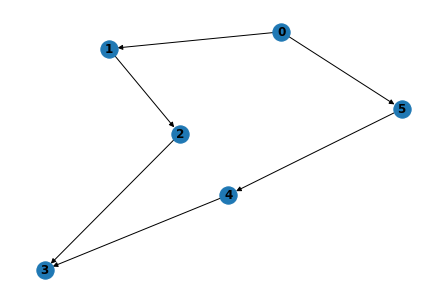

In [11]:
G = FrequencyGraph([(0, 1), (1, 2),(2, 3), (4, 3), (5, 4), (0, 5)], freqs, a, f_drive=freqs_d, cz=False)
# G.check_constraint(d, qutrit=False)
G.plot()

In [12]:
d
keys = ['A1', 'A2i', 'A2j', "E1", "E2", "E4", "F1", "F2", "M1"]
d_dict = { k: dd for (k, dd) in zip(keys, d)}
d_dict

{'A1': 0.017,
 'A2i': 0.03,
 'A2j': 0.03,
 'E1': 0.017,
 'E2': 0.03,
 'E4': 0.002,
 'F1': 0.017,
 'F2': 0.025,
 'M1': 0.017}

In [13]:
# d
# keys = ['A1', 'A2i', 'A2j', "E1", "E2", "E4", "E1t", "E2t", "E4t", "F1", "F2", "M1"]
# d_dict = { k: dd for (k, dd) in zip(keys, d)}
    

In [14]:
cr_keys = ['A1', 'A2i', 'A2j', "E1", "E2", "E4","C1", "C1b", "F1", "F2", "M1"]

In [15]:
cstr_key = cr_keys
# cstr_key = None

[[(0, 1), (0, 5), (1, 2), (2, 3), (4, 3), (5, 4)], [(0, 1), (0, 5), (1, 2), (2, 3), (4, 3), (5, 4)], [(0, 1), (0, 5), (1, 2), (2, 3), (4, 3), (5, 4)], [(0, 1), (0, 5), (1, 2), (2, 3), (4, 3), (5, 4)], [(0, 1), (0, 5), (1, 2), (2, 3), (4, 3), (5, 4)], [(0, 1), (0, 5), (1, 2), (2, 3), (4, 3), (5, 4)], [(0, 1), (0, 5), (1, 2), (2, 3), (4, 3), (5, 4)], [(0, 1), (0, 5), (1, 2), (2, 3), (4, 3), (5, 4)], [(0, 1, 5), (0, 5, 1), (1, 2, 0), (2, 3, 1), (4, 3, 5), (5, 4, 0)], [(0, 1, 5), (0, 5, 1), (1, 2, 0), (2, 3, 1), (4, 3, 5), (5, 4, 0)], [(0, 1, 5), (0, 5, 1), (1, 2, 0), (2, 3, 1), (4, 3, 5), (5, 4, 0)]]
Qubit collisions:
yield   = 0.1634
average = 1.9291


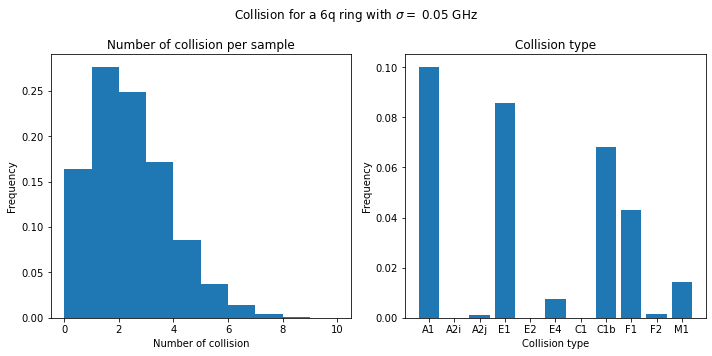

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# plot of the yield
ax = axs[0]
collisions, c, idx_len = G.get_collision(d_dict, sigma=0.05, qutrit=False, cstr=cstr_key)
ax.hist(collisions, bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], density=True)

#legend
ax.set_xlabel("Number of collision")
ax.set_ylabel("Frequency")
ax.set_title("Number of collision per sample")

print("Qubit collisions:")
print(f"yield   = {np.sum(collisions==0)/len(collisions)}")
print(f"average = {np.sum(collisions)/len(collisions)}")

# histogram of the type of errors
ax = axs[1]
c = np.array(c)
cc = np.sum(~np.array(c), axis=1)
v = [sum(idx_len[:k]) for k in range(len(idx_len)+1)]
col = np.array([np.mean(cc[v[i]: v[i+1]]) for i in range(len(v)-1)])/10000

ax.bar(np.arange(11), col)
ax.set_xticks(np.arange(11))
ax.set_xticklabels(cr_keys)

ax.set_xlabel('Collision type')
ax.set_ylabel('Frequency')

ax.set_title("Collision type")

fig.suptitle("Collision for a 6q ring with $\sigma=$ 0.05 GHz")

fig.tight_layout()

In [28]:
c

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True, False, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [35]:
cr_keys

['A1', 'A2i', 'A2j', 'E1', 'E2', 'E4', 'C1', 'C1b', 'F1', 'F2', 'M1']

In [28]:
[cc[v[i]: v[i+1]] for i in range(len(v)-1)]

[array([1260,  391,  386, 1198, 1245, 1236]),
 array([0, 0, 0, 0, 0, 0]),
 array([ 1, 29, 27,  3,  1,  1]),
 array([1229,  108,  142, 1206, 1182, 1200]),
 array([0, 0, 1, 0, 0, 0]),
 array([ 31, 206, 194,  43,  24,  21]),
 array([0, 0, 0, 0, 0, 0]),
 array([1018,   45,   69, 1031,  979, 1023]),
 array([1207, 1213,    4,    3,  111,    4]),
 array([ 0,  0, 35, 43,  1, 36]),
 array([423, 443,  61,   3,  14,   1])]

In [21]:
idx_len[:len(idx_len)+1] == idx_len

True

In [27]:
1345+395+375+1300+1311+1293

6019

In [ ]:
fig, axs = plt.subplots(2, sharex=True, sharey=True)
ax = axs[0]
collisions = G.get_collision(d_dict, qutrit=False, cstr=cstr_key)
ax.hist(collisions, bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

print("Qubit collisions:")
print(f"yield   = {np.sum(collisions==0)/len(collisions)}")
print(f"average = {np.sum(collisions)/len(collisions)}")

# ax = axs[1]
# collisions = G.get_collision(d, qutrit=True)
# ax.hist(collisions, bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# print("Qutrit collisions:")
# print(f"yield   = {np.sum(collisions==0)/len(collisions)}")
# print(f"average = {np.sum(collisions)/len(collisions)}")

In [16]:
d_dict

{'A1': 0.017,
 'A2i': 0.03,
 'A2j': 0.03,
 'E1': 0.017,
 'E2': 0.03,
 'E4': 0.002,
 'E1t': 0.017,
 'E2t': 0.025,
 'E4t': 0.017}

ValueError: too many values to unpack (expected 2)

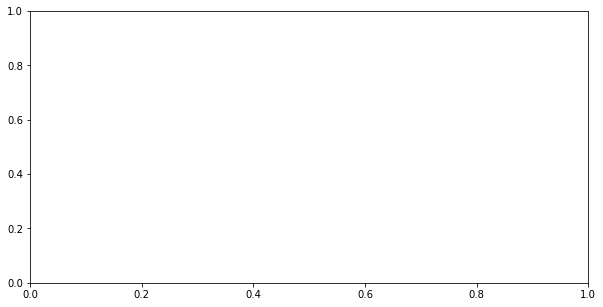

In [31]:

# initialization the plot
fig, ax = plt.subplots( figsize=(10, 5))

# N_samples
Nsamples=100000

# varying the dispersion of the frequency
s_vec = np.linspace(0, 0.1, 41)

# saving the results
collisions, c = np.array([G.get_collision(d_dict, Nsamples=Nsamples, sigma=s, cstr=cstr_key) for s in s_vec])

n_collisions = [0]
y = [(Nsamples-np.count_nonzero(collisions-n, axis=1))/Nsamples for n in n_collisions]

ax.plot(s_vec*1e3, y[0], label=f'Configuration {0}')

# 1/64 limit
ax.axhline(1/64, ls='--', color='Gray')
ax.text(60, 1/64+0.01, '1 Chip per wafer', fontsize=12)

ax.axvline(15, ls='-.', color='Gray')
ax.text(16, 0.8, 'IBM laser')
ax.axvline(50, ls='--', color='Gray')
ax.text(51, 0.8, 'Berkeley FAB')
# Legend and labels
ax.set_ylabel(f'Yield')
ax.set_xlabel('Frequency dispersion $\sigma_f$ (MHz)')
ax.set_yscale('log')
ax.set_title('Yield for collision free sample')
ax.legend(ncol=1, fontsize=10, loc=3)

ax.set_xlim(0, 100)

In [30]:
collisions

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [3, 1, 1, ..., 3, 5, 3],
       [3, 3, 1, ..., 6, 4, 3],
       [5, 3, 4, ..., 6, 4, 3]])

(0.0, 100.0)

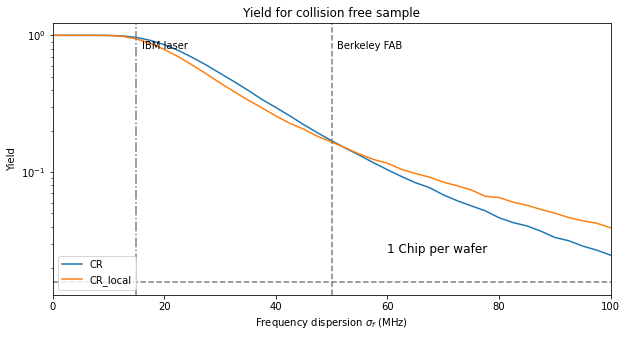

In [36]:

# initialization the plot
fig, ax = plt.subplots( figsize=(10, 5))



ax.plot(s_vec*1e3, y[0], label=f'CR')
ax.plot(s_vec*1e3, y0[0], label=f'CR_local')

# 1/64 limit
ax.axhline(1/64, ls='--', color='Gray')
ax.text(60, 1/64+0.01, '1 Chip per wafer', fontsize=12)

ax.axvline(15, ls='-.', color='Gray')
ax.text(16, 0.8, 'IBM laser')
ax.axvline(50, ls='--', color='Gray')
ax.text(51, 0.8, 'Berkeley FAB')
# Legend and labels
ax.set_ylabel(f'Yield')
ax.set_xlabel('Frequency dispersion $\sigma_f$ (MHz)')
ax.set_yscale('log')
ax.set_title('Yield for collision free sample')
ax.legend(ncol=1, fontsize=10, loc=3)

ax.set_xlim(0, 100)

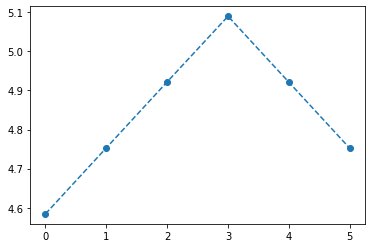

In [125]:
fig, ax = plt.subplots()
ax.plot(freqs, 'o--')

In [19]:
y0 = y

# Simulation a single yeild

In [41]:

fnames = [
    "solutions/6nodes/orientation%3D1_alphaLB%3D-0.27_alphafree",
    "solutions/6nodes/orientation%3D2_alphaLB%3D-0.27_alphafree",
    "solutions/6nodes/orientation%3D3_alphaLB%3D-0.27_alphafree"
         ]
graphs = [[(0, 1), (1, 2),(2, 3), (4, 3), (5, 4), (0, 5)],
          [(0, 1), (1, 2),(3, 2), (3, 4), (5, 4), (0, 5)],
          [(0, 1), (2, 1),(2, 3), (4, 3), (4, 5), (0, 5)]]

NameError: name 'fnames' is not defined

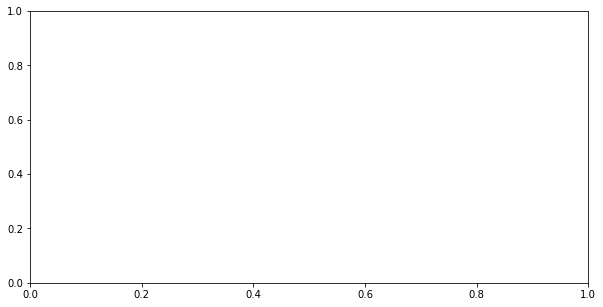

In [14]:

# initialization the plot
fig, ax = plt.subplots( figsize=(10, 5))

for j, (fname, g) in enumerate(zip(fnames, graphs)):

    freqs, a, d = extract_solution(fname)
    N = len(freqs)

    G = FrequencyGraph(g, freqs, a)
    
    # N_samples
    Nsamples=100000

    # varying the dispersion of the frequency
    s_vec = np.linspace(0, 0.1, 41)

    # saving the results
    collisions = np.array([G.get_collision(d, Nsamples=Nsamples, sigma=s) for s in s_vec])

    n_collisions = [0]
    y = [(Nsamples-np.count_nonzero(collisions-n, axis=1))/Nsamples for n in n_collisions]
    
    ax.plot(s_vec*1e3, y[0], label=f'Configuration {j}')

# 1/64 limit
ax.axhline(1/64, ls='--', color='Gray')
ax.text(60, 1/64+0.01, '1 Chip per waffer', fontsize=12)

ax.axvline(15, ls='-.', color='Gray')
ax.text(16, 0.8, 'IBM laser')
ax.axvline(50, ls='--', color='Gray')
ax.text(51, 0.8, 'Berkeley FAB')
# Legend and labels
ax.set_ylabel(f'Yield')
ax.set_xlabel('Frequency dispersion $\sigma_f$ (MHz)')
ax.set_yscale('log')
ax.set_title('Yield for collision free sample')
ax.legend(ncol=1, fontsize=10, loc=3)

ax.set_xlim(0, 100)

(0.0, 100.0)

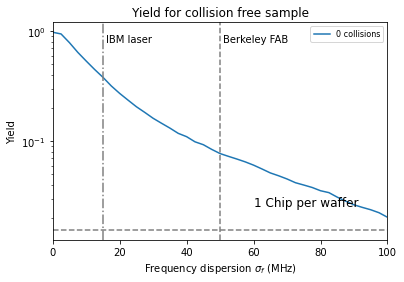

In [11]:
fig, ax = plt.subplots()
for i in range(len(n_collisions)):
    ax.plot(s_vec*1e3, y[i], label=f'{n_collisions[i]} collisions')

# 1/64 limit
ax.axhline(1/64, ls='--', color='Gray')
ax.text(60, 1/64+0.01, '1 Chip per waffer', fontsize=12)

ax.axvline(15, ls='-.', color='Gray')
ax.text(16, 0.8, 'IBM laser')
ax.axvline(50, ls='--', color='Gray')
ax.text(51, 0.8, 'Berkeley FAB')
# Legend and labels
ax.set_ylabel(f'Yield')
ax.set_xlabel('Frequency dispersion $\sigma_f$ (MHz)')
ax.set_yscale('log')
ax.set_title('Yield for collision free sample')
ax.legend(ncol=2, fontsize=8)

ax.set_xlim(0, 100)

# Monte Carlo simulation of the Yield

In [32]:
# construct the graph
target_frequencies = np.array([G.nodes[n]['freq'] for n in G.nodes], dtype=np.float32)
target_alpha = np.array([G.nodes[n]['a'] for n in G.nodes], dtype=np.float32)

In [33]:
# N_samples
Nsamples=1000

# varying the dispersion of the frequency
s_vec = np.linspace(0, 0.05, 21)

# let say the alpha dispersion is small
s_alpha = 0.005

# saving the results
collisions = np.zeros((len(s_vec), Nsamples))

# loop through sigma
for i_s, s in enumerate(s_vec):

    freqs_distribution = generate_sample(target_frequencies, sigma=s, Nsamples=Nsamples)
    alpha_distribution = generate_sample(target_alpha, sigma=s_alpha, Nsamples=Nsamples)

    for i in range(Nsamples):
        G = nx.DiGraph()
        G.add_edges_from([(0, 1), (1, 2),(2, 3), (3, 4), (4, 5), (6, 5), (7, 6), (8, 7), (9, 8), (0, 9)])
        # G.add_edges_from([(1, 0), (2, 1),(3, 2), (4, 3), (5, 4), (5, 6), (6, 7), (7, 8), (8, 9), (9, 0)])
        for k, n in enumerate(G.nodes):
            G.nodes[n]['freq'] = freqs_distribution[k, i]
            G.nodes[n]['a'] = alpha_distribution[k, i]
        collisions[i_s, i] = check(G, d, verbose=0)

IndexError: index 6 is out of bounds for axis 0 with size 6

In [ ]:
fig, ax = plt.subplots()
ax.hist(collisions[0, :], bins=[0,1,2,3,4,5,6,7, 8, 9, 10])
ax.hist(collisions[10, :], bins=[0,1,2,3,4,5,6,7, 8, 9, 10])

In [ ]:
y2 = (Nsamples-np.count_nonzero(collisions, axis=1))/Nsamples

In [ ]:
fig, ax = plt.subplots()
ax.plot(s_vec, y)
ax.plot(s_vec, y2)

# 1/64 limit
ax.axhline(1/64, ls='--', color='Gray')

# Legend and labels
ax.set_ylabel(f'Yield')
ax.set_xlabel('Frequency dispersion $\sigma_f$')
ax.set_yscale('log')

In [51]:
yold = y

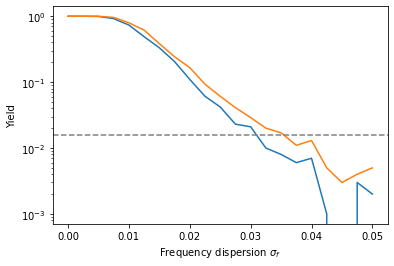

In [59]:
fig, ax = plt.subplots()
ax.plot(s_vec, y)
ax.plot(s_vec, yold)
# ax.plot(s_vec, y_ref)

# 1/64 limit
ax.axhline(1/64, ls='--', color='Gray')

# Legend and labels
ax.set_ylabel(f'Yield')
ax.set_xlabel('Frequency dispersion $\sigma_f$')
ax.set_yscale('log')

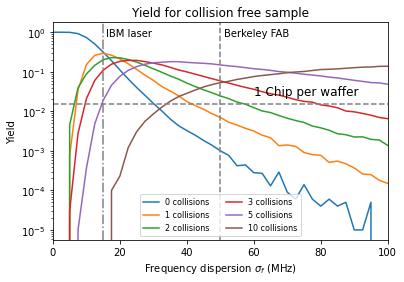

In [258]:
    # extracting the data
    freqs, a, d = extract_solution(fname)

    # construct the graph. here we suppose a 10 nodes graph with a specific Control-target geometry
    G = nx.DiGraph()
    G.add_edges_from([(0, 1), (1, 2), (2, 3), (3, 4), (4, 5),
                      (6, 5), (7, 6), (8, 7), (9, 8), (0, 9)])
    for k, n in enumerate(G.nodes):
        G.nodes[n]['freq'] = freqs[k]
        G.nodes[n]['a'] = a[k]

    # checking the solution
    check(G, d)

    # construct the graph
    target_frequencies = np.array([G.nodes[n]['freq']
                                   for n in G.nodes], dtype=np.float32)
    target_alpha = np.array([G.nodes[n]['a']
                             for n in G.nodes], dtype=np.float32)

    # Plot the yield
    # N_samples
    Nsamples = 100000

    # varying the dispersion of the frequency
    s_vec = np.linspace(0, 0.1, 41)

    # let say the alpha dispersion is small
    s_alpha = 0.005

    # saving the results
    collisions = np.zeros((len(s_vec), Nsamples))

    # loop through sigma
    for i_s, s in enumerate(s_vec):

        freqs_distribution = generate_random_sample(
            target_frequencies, sigma=s,       Nsamples=Nsamples)
        alpha_distribution = generate_random_sample(
            target_alpha,       sigma=s_alpha, Nsamples=Nsamples)

        idx_list, expr_list = construct_constraint_function(
            G, freqs_distribution, alpha_distribution, d)

        c = []
        for idx, expr in zip(idx_list, expr_list):
            for i in idx:
                c.append(expr(*i))
        c = np.array(c)
        # counting the tiime where all the conditions are no validated
        collisions[i_s, :] = np.sum(~c, axis=0)

    n_collisions = [0, 1, 2, 3, 5, 10]
    y = [(Nsamples-np.count_nonzero(collisions-n, axis=1)) /
         Nsamples for n in n_collisions]

    fig, ax = plt.subplots()
    for i in range(len(n_collisions)):
        ax.plot(s_vec*1e3, y[i], label=f'{n_collisions[i]} collisions')

    # 1/64 limit
    ax.axhline(1/64, ls='--', color='Gray')
    ax.text(60, 1/64+0.01, '1 Chip per waffer', fontsize=12)

    ax.axvline(15, ls='-.', color='Gray')
    ax.text(16, 0.8, 'IBM laser')
    ax.axvline(50, ls='--', color='Gray')
    ax.text(51, 0.8, 'Berkeley FAB')
    # Legend and labels
    ax.set_ylabel(f'Yield')
    ax.set_xlabel('Frequency dispersion $\sigma_f$ (MHz)')
    ax.set_yscale('log')
    ax.set_title('Yield for collision free sample')
    ax.legend(ncol=2, fontsize=8)

    ax.set_xlim(0, 100)
    plt.show()


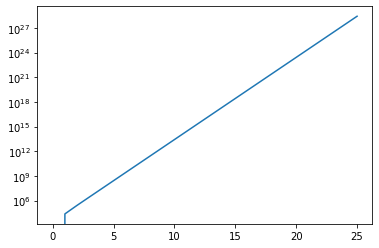

In [265]:
fig, ax = plt.subplots()
x = np.arange(10)

y = [0]
for k in range(25):
    y.append(y[k]*10+2*12000)
ax.plot(y)
ax.set_yscale('log')